<a href="https://colab.research.google.com/github/agni755/Project/blob/main/RETAIL_PROFIT_PREDICTION_Texas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Install necessary packages
!pip install statsmodels openpyxl scipy matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_goldfeldquandt
from scipy.stats import bartlett

In [27]:
from google.colab import files
uploaded = files.upload()




Saving Data for Case Study.xlsx to Data for Case Study (1).xlsx


In [28]:
# Load data
file_path = '/content/Data for Case Study.xlsx'  # Update this path in Colab
df = pd.read_excel(file_path)

In [29]:
df.head()

,Order ID,Name,Category,Sub Category,City,Order Date,Region,State,Sales,Discount,Profit
0,OD1,James,Frozen Foods,Ice Cream,Houston,2019-08-11 00:00:00,North,Texas,44882.684644,0.344161,10816.370636
1,OD2,John,Personal Care,Shampoo,Dallas,2019-08-11 00:00:00,South,Texas,39178.119470,0.307477,8306.974288
2,OD3,William,Baby Care,Baby Formula,Austin,2019-12-06 00:00:00,West,Texas,60843.752663,0.351436,14129.644123
3,OD4,Michael,Health & Wellness,Bandages,San Antonio,2018-11-10 00:00:00,South,Texas,36063.802870,0.230390,6733.953610
4,OD5,David,Baby Care,Baby Wipes,Fort Worth,2018-11-10 00:00:00,South,Texas,34680.856351,0.275845,7271.027646


In [30]:
# Basic Info
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Name           9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   State          9994 non-null   object 
 8   Sales          9994 non-null   float64
 9   Discount       9994 non-null   float64
 10  Profit         9994 non-null   float64
dtypes: float64(3), object(8)
memory usage: 859.0+ KB


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,50730.359420,0.273465,10270.835211
std,10945.859065,0.067854,2593.158935
min,10000.000000,0.010000,1000.000000
25%,43405.590005,0.228057,8539.296680
50%,50767.571421,0.273506,10287.824893
75%,58060.835275,0.319310,12014.393055
max,100000.000000,0.500000,20000.000000


In [31]:
# Check for missing values
df.isnull().sum()



,0
Order ID,0
Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
State,0
Sales,0
Discount,0


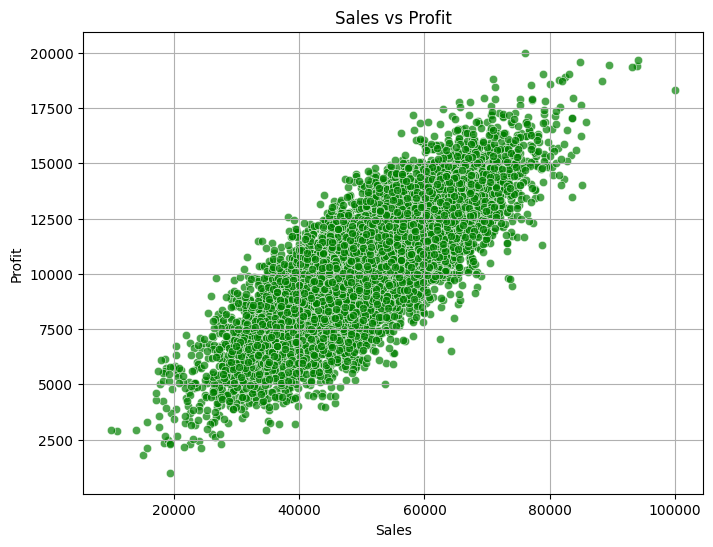

In [32]:
# Plot Sales vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='Profit',color='green', alpha=0.7, marker='o')
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.show()



Correlation between Sales and Profit: 0.8075448975628339


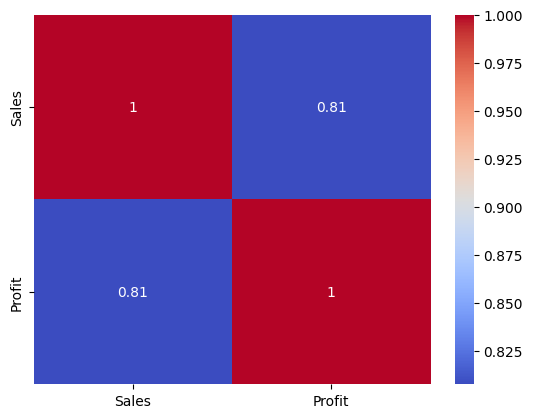

In [33]:
# Correlation
print("Correlation between Sales and Profit:", df['Sales'].corr(df['Profit']))
sns.heatmap(df[['Sales', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.show()

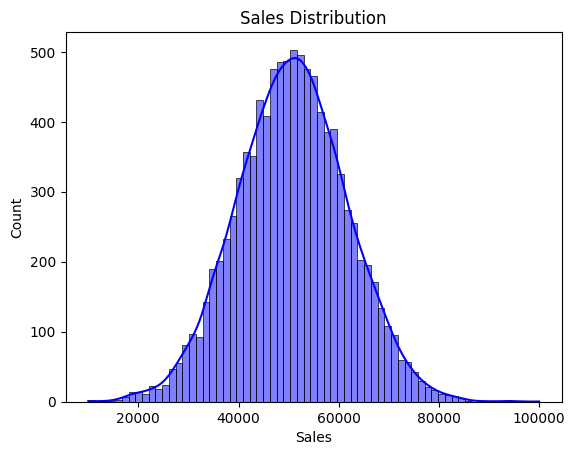

In [35]:
# Distribution plots of Sales
sns.histplot(df['Sales'], kde=True, color='blue', edgecolor='black')
plt.title("Sales Distribution")
plt.show()


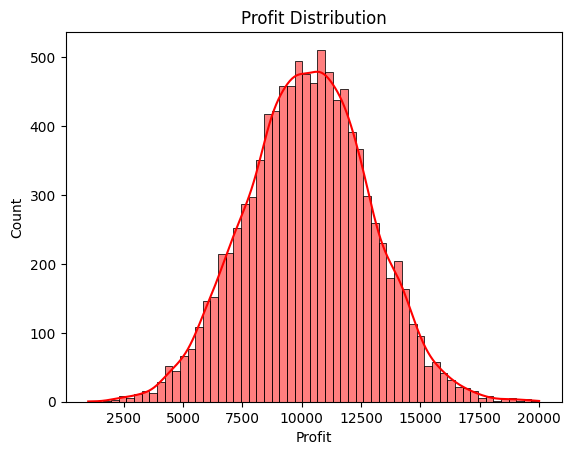

In [36]:
# Distribution plots of Profit
sns.histplot(df['Profit'], kde=True, color='red', edgecolor='black')
plt.title("Profit Distribution")
plt.show()

In [37]:
# Removing Outlier
from scipy.stats import zscore

df_filtered = df[(np.abs(zscore(df[['Sales', 'Profit']])) < 3).all(axis=1)]


print("Original dataset size:", df.shape)
print("Filtered dataset size:", df_filtered.shape)

Original dataset size: (9994, 11)
Filtered dataset size: (9948, 11)


In [38]:
# Define X and y
X = df_filtered[['Sales']]
y = df_filtered['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
r2_simple = r2_score(y_test, y_pred)
mape_simple = mean_absolute_percentage_error(y_test, y_pred)

print(f"Filtered Linear Regression R²: {r2_simple:.4f}")
print(f"Filtered Linear Regression MAPE: {mape_simple:.4f}")


Filtered Linear Regression R²: 0.6543
Filtered Linear Regression MAPE: 0.1296


In [39]:
#Durbin-Watson Test
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const).fit()
residuals = model.resid

dw = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw:.4f}")

Durbin-Watson Statistic: 1.9618


In [40]:
# Goldfeld-Quandt Test
gq_test = het_goldfeldquandt(y_train, X_const)
print("\nGoldfeld-Quandt p-value:", gq_test[1])

# Interpretation
if gq_test[1] < 0.05:
    print("→ Heteroscedasticity detected (reject null hypothesis of equal variance)")
else:
    print("→ No evidence of heteroscedasticity (fail to reject null hypothesis)")



Goldfeld-Quandt p-value: 0.5399972378108977
→ No evidence of heteroscedasticity (fail to reject null hypothesis)


In [41]:
# Divide residuals into two groups: low and high sales
median_sales = X_train['Sales'].median()
group1 = residuals[X_train['Sales'] <= median_sales]
group2 = residuals[X_train['Sales'] > median_sales]

bartlett_test = bartlett(group1, group2)
print(f"Bartlett Test Statistic: {bartlett_test.statistic:.4f}, p-value: {bartlett_test.pvalue:.4f}")

Bartlett Test Statistic: 0.0291, p-value: 0.8646


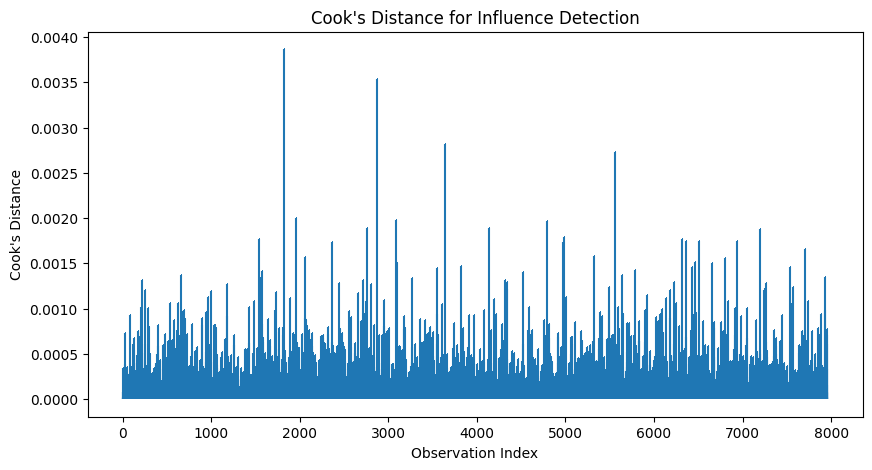

Influential Point Indexes: [  29   84  120  124  125  174  183  206  209  216  220  248  251  288
  301  393  403  457  475  508  538  556  582  597  607  617  621  625
  643  650  653  667  689  700  727  783  816  840  891  894  940  945
  967  982  995  996 1034 1037 1047 1050 1125 1152 1172 1178 1251 1257
 1380 1406 1428 1429 1476 1485 1519 1541 1556 1571 1572 1577 1583 1584
 1602 1642 1658 1662 1721 1734 1735 1736 1770 1807 1812 1816 1836 1884
 1888 1901 1921 1933 1954 1969 1978 1984 1988 2024 2047 2055 2058 2069
 2072 2084 2102 2118 2120 2132 2141 2153 2239 2250 2266 2267 2273 2282
 2304 2316 2317 2330 2350 2362 2368 2369 2389 2413 2414 2439 2443 2448
 2471 2474 2476 2485 2500 2514 2560 2577 2578 2621 2622 2627 2657 2693
 2717 2720 2727 2750 2755 2777 2809 2835 2870 2889 2926 2945 2951 2971
 2972 2983 2984 3003 3086 3095 3103 3123 3128 3151 3173 3179 3192 3269
 3271 3306 3362 3373 3384 3397 3417 3419 3434 3448 3475 3476 3483 3507
 3544 3546 3553 3564 3607 3635 3728 3742 3744 3779

In [42]:
influence = model.get_influence()
cooks = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(10, 5))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",", basefmt=" ")
plt.title("Cook's Distance for Influence Detection")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Show influential points
influential_points = np.where(cooks > 4 / len(X_train))[0]
print("Influential Point Indexes:", influential_points)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Remove outliers using Cook's Distance
threshold = 4 / len(X_train)
mask = cooks < threshold
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

# Create a pipeline with Polynomial Features (degree 2) + Linear Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit on filtered data
poly_model.fit(X_train_filtered, y_train_filtered)

# Predict on test set
y_pred_poly = poly_model.predict(X_test)

# Evaluation
r2_poly = r2_score(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

print(f"Polynomial Regression (degree=2) R²: {r2_poly:.4f}")
print(f"Polynomial Regression (degree=2) MAPE: {mape_poly:.4f}")


Polynomial Regression (degree=2) R²: 0.6543
Polynomial Regression (degree=2) MAPE: 0.1296


In [44]:
# Add small constant to avoid log(0)
df['log_Sales'] = np.log1p(df['Sales'])
df['log_Profit'] = np.log1p(df['Profit'])

# Redefine X and y
X_log = df[['log_Sales']]
y_log = df['log_Profit']

# Split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Fit model
log_model = LinearRegression()
log_model.fit(X_train_log, y_train_log)

# Predict
y_pred_log = log_model.predict(X_test_log)

# Back-transform predictions
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

# Evaluate
r2_log = r2_score(y_test_actual, y_pred_actual)
mape_log = mean_absolute_percentage_error(y_test_actual, y_pred_actual)

print(f"Log-Transformed Model R²: {r2_log:.4f}")
print(f"Log-Transformed Model MAPE: {mape_log:.4f}")


Log-Transformed Model R²: 0.6424
Log-Transformed Model MAPE: 0.1348


In [45]:
# First, check for actual column names
print(df_filtered.columns)

# Strip trailing spaces from all column names
df_filtered.columns = df_filtered.columns.str.strip()




Index(['Order ID', 'Name', 'Category', 'Sub Category ', 'City', 'Order Date',
       'Region', 'State', 'Sales', 'Discount ', 'Profit'],
      dtype='object')


In [46]:
# Feature columns
feature_cols = ['Sales', 'Discount'] + \
               [col for col in df_filtered.columns if col.startswith('Category_') or col.startswith('Region_')]

X = df_filtered[feature_cols]
y = df_filtered['Profit']

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2_multi = r2_score(y_test, y_pred)
mape_multi = mean_absolute_percentage_error(y_test, y_pred)

print(f"Multiple Linear Regression R²: {r2_multi:.4f}")
print(f"Multiple Linear Regression MAPE: {mape_multi:.4f}")


Multiple Linear Regression R²: 0.9853
Multiple Linear Regression MAPE: 0.0260


In [47]:
# Create summary dataframe
results = pd.DataFrame({
    'Model': [
        'Simple Linear Regression',
        'Polynomial Regression (deg=2)',
        'Log-Transformed Regression',
        'Multiple Linear Regression'
    ],
    'R²': [r2_simple, r2_poly, r2_log, r2_multi],
    'MAPE': [mape_simple, mape_poly, mape_log, mape_multi]
})

# Display
print(results)


                           Model        R²      MAPE
0       Simple Linear Regression  0.654349  0.129587
1  Polynomial Regression (deg=2)  0.654295  0.129578
2     Log-Transformed Regression  0.642439  0.134841
3     Multiple Linear Regression  0.985282  0.025964


<ipython-input-48-c2e98864e2db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='R²', palette='crest')


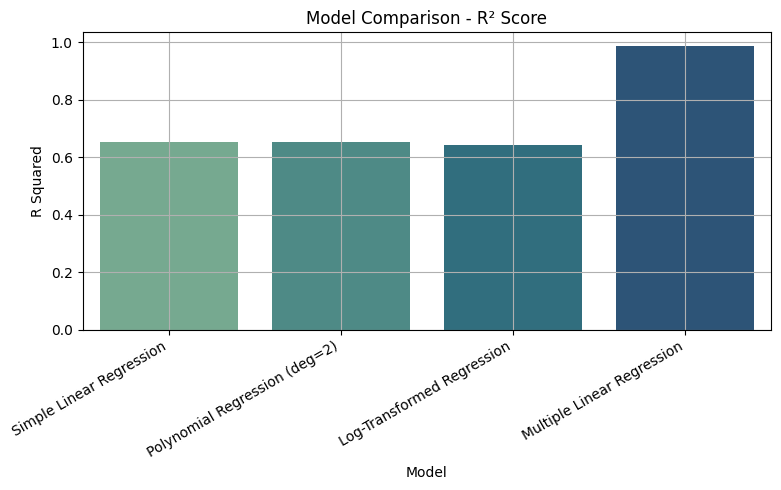

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results, x='Model', y='R²', palette='crest')
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=30, ha='right')
plt.ylabel('R Squared')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-49-caca8a3fa184>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='MAPE', palette='flare')


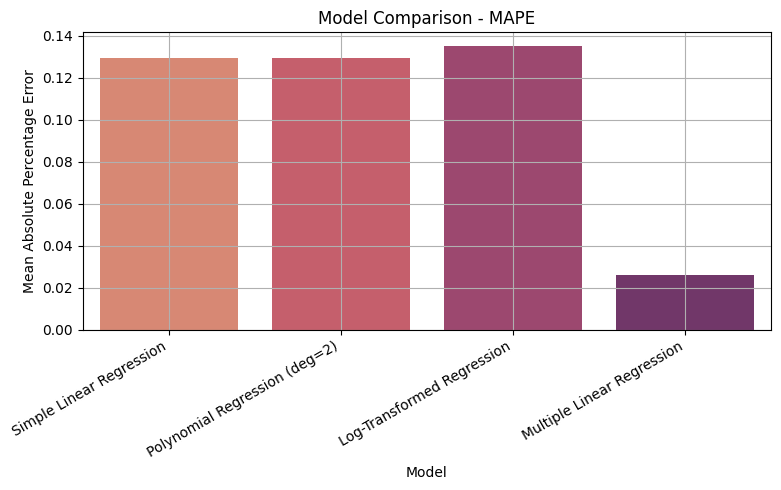

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results, x='Model', y='MAPE', palette='flare')
plt.title('Model Comparison - MAPE')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Mean Absolute Percentage Error')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-50-9c68a6bb4d15>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Abs_Coeff', y='Feature', palette='viridis')


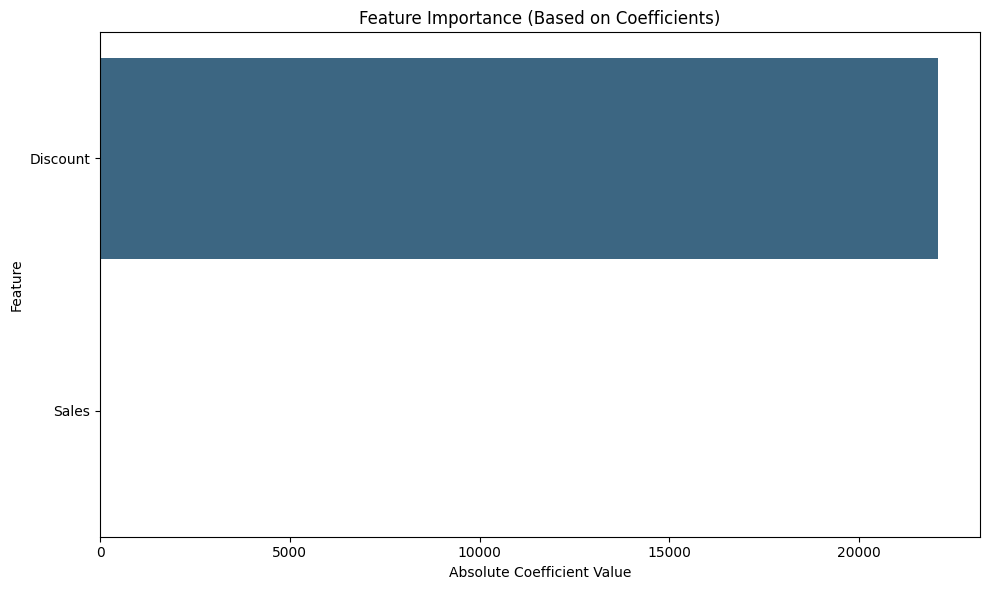

In [50]:
# Get feature names and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Sort by absolute value
feature_importance['Abs_Coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coeff', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Abs_Coeff', y='Feature', palette='viridis')
plt.title("Feature Importance (Based on Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


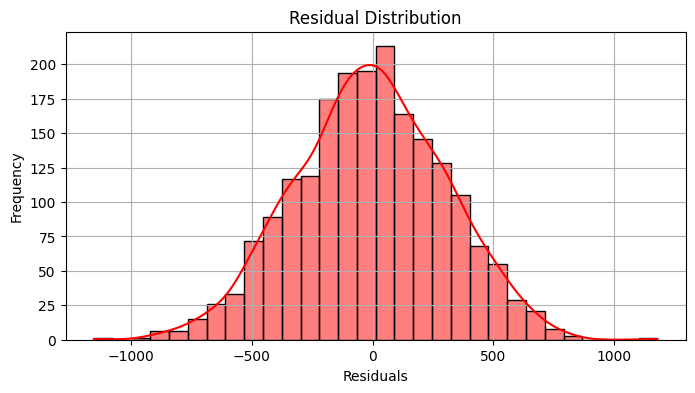

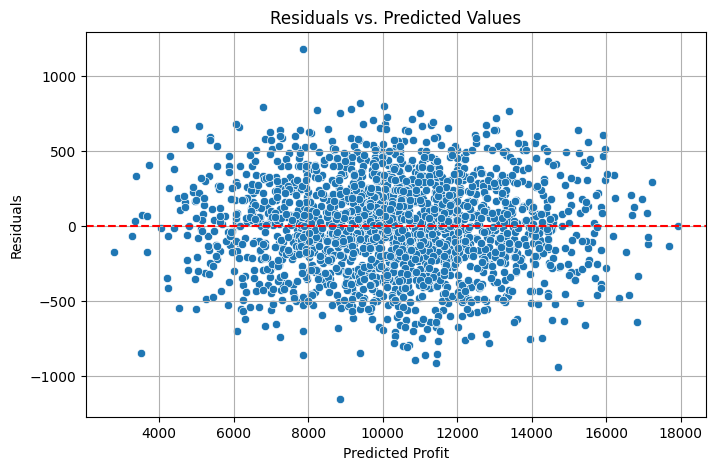

In [51]:
# Calculate residuals
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Residuals vs. Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


In [52]:
import joblib
import os


# Save models to the /content/ directory
joblib.dump(lr, "/content/simple_linear_regression_model.pkl")
joblib.dump(poly_model, "/content/polynomial_regression_model.pkl")
joblib.dump(log_model, "/content/log_transformed_regression_model.pkl")
joblib.dump(model, "/content/multiple_linear_regression_model.pkl")

['/content/multiple_linear_regression_model.pkl']

In [ ]:
from google.colab import files

# Download model files
files.download("/content/simple_linear_regression_model.pkl")
files.download("/content/polynomial_regression_model.pkl")
files.download("/content/log_transformed_regression_model.pkl")
files.download("/content/multiple_linear_regression_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>